In [100]:
import pandas as pd
import numpy as np

import re, string
from datasets import load_dataset

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

import gensim
import pyLDAvis
import pyLDAvis.gensim_models as ldv

from wordcloud import WordCloud

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asims\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asims\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [68]:
dataset = load_dataset("squad")
dataset

Reusing dataset squad (C:\Users\asims\.cache\huggingface\datasets\squad\plain_text\1.0.0\d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453)


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 87599
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 10570
    })
})

In [116]:
df = pd.DataFrame.from_dict(dataset['train'])

In [117]:
df.head()

,id,title,context,question,answers
0,5733be284776f41900661182,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,"{'text': ['Saint Bernadette Soubirous'], 'answ..."
1,5733be284776f4190066117f,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,"{'text': ['a copper statue of Christ'], 'answe..."
2,5733be284776f41900661180,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,"{'text': ['the Main Building'], 'answer_start'..."
3,5733be284776f41900661181,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,{'text': ['a Marian place of prayer and reflec...
4,5733be284776f4190066117e,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,{'text': ['a golden statue of the Virgin Mary'...


In [118]:
df.shape

(87599, 5)

In [119]:
top_titles = df.title.value_counts()[:20]

In [120]:
top_titles

New_York_City                       817
American_Idol                       802
Beyoncé                             758
Frédéric_Chopin                     697
Queen_Victoria                      680
Buddhism                            610
New_Haven,_Connecticut              602
2008_Sichuan_earthquake             521
2008_Summer_Olympics_torch_relay    500
Muammar_Gaddafi                     489
Hellenistic_period                  469
Napoleon                            458
Middle_Ages                         452
Modern_history                      448
Portugal                            435
Gamal_Abdel_Nasser                  433
Dwight_D._Eisenhower                430
Kanye_West                          428
Southampton                         426
The_Blitz                           414
Name: title, dtype: int64

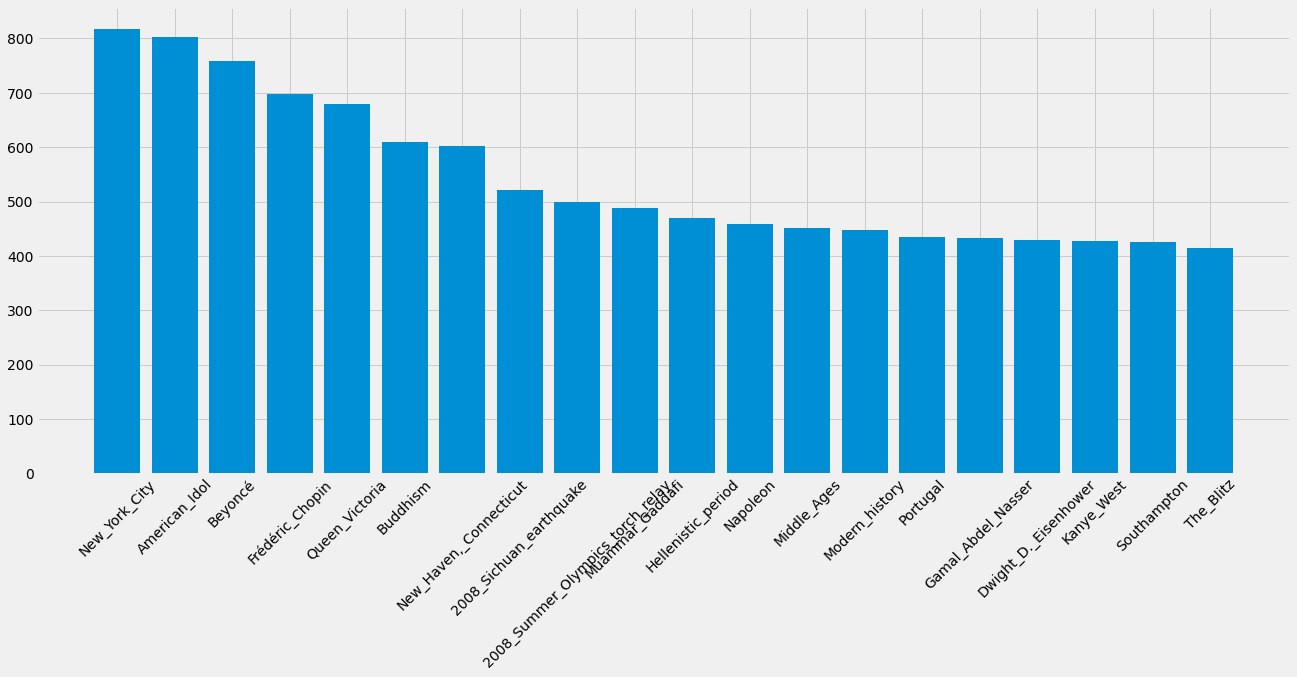

In [123]:
plt.figure(figsize=(20,8))
plt.bar(top_titles.keys(), top_titles.values)
plt.xticks(rotation=45);

In [124]:
df = df[df.title.isin(list(top_titles.keys()))]

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10869 entries, 269 to 86003
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        10869 non-null  object
 1   title     10869 non-null  object
 2   context   10869 non-null  object
 3   question  10869 non-null  object
 4   answers   10869 non-null  object
dtypes: object(5)
memory usage: 509.5+ KB


In [126]:
df.isnull().sum()

id          0
title       0
context     0
question    0
answers     0
dtype: int64

In [127]:
df['title'].unique()

array(['Beyoncé', 'Frédéric_Chopin', '2008_Sichuan_earthquake',
       'New_York_City', 'Portugal', 'Kanye_West', 'Buddhism',
       'American_Idol', '2008_Summer_Olympics_torch_relay', 'Southampton',
       'Middle_Ages', 'Queen_Victoria', 'Hellenistic_period', 'Napoleon',
       'New_Haven,_Connecticut', 'Gamal_Abdel_Nasser', 'Muammar_Gaddafi',
       'The_Blitz', 'Modern_history', 'Dwight_D._Eisenhower'],
      dtype=object)

In [128]:
df.drop(['id'], axis=1, inplace=True)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10869 entries, 269 to 86003
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     10869 non-null  object
 1   context   10869 non-null  object
 2   question  10869 non-null  object
 3   answers   10869 non-null  object
dtypes: object(4)
memory usage: 424.6+ KB


In [130]:
for col in df.columns:
    df[col] = df[col].astype('str') 

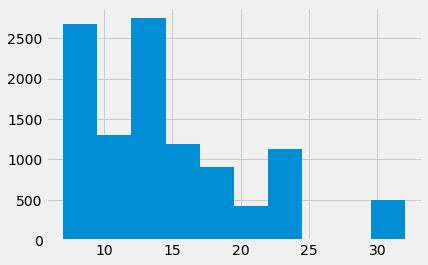

In [131]:
df['title'].str.len().hist();

* Average word length 

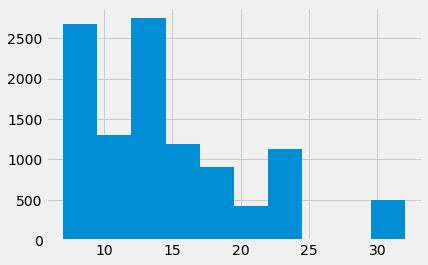

In [132]:
df['title'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist();

In [136]:
corpus=[]
df2= df['title'].str.split()
df2=df2.values.tolist()
corpus=[word for i in df2 for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop_words:
        dic[word]+=1

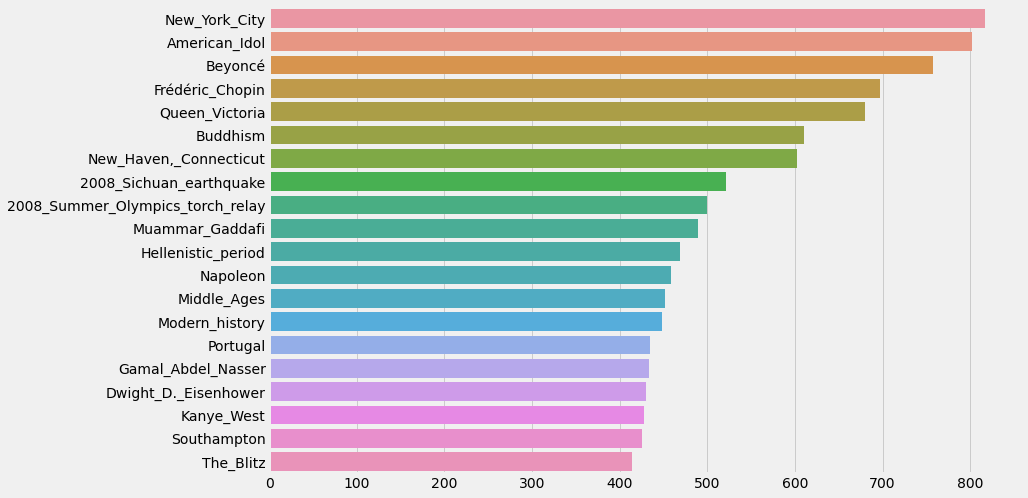

In [139]:
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop_words):
        x.append(word)
        y.append(count)
        
plt.figure(figsize=(12,8))
sns.barplot(x=y,y=x);


In [140]:
def preprocess_news(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in df['title']:
        words=[w for w in word_tokenize(news) if (w not in stop_words)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus=preprocess_news(df)

In [141]:
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [142]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()


[(0,
  '0.213*"_Connecticut" + 0.213*"New_Haven" + 0.153*"Gamal_Abdel_Nasser" + 0.095*"Napoleon" + 0.094*"2008_Summer_Olympics_torch_relay" + 0.088*"Hellenistic_period" + 0.085*"Middle_Ages" + 0.060*"Portugal" + 0.000*"New_York_City" + 0.000*"Beyoncé"'),
 (1,
  '0.276*"Queen_Victoria" + 0.228*"Beyoncé" + 0.209*"Frédéric_Chopin" + 0.156*"2008_Sichuan_earthquake" + 0.129*"Kanye_West" + 0.000*"Muammar_Gaddafi" + 0.000*"2008_Summer_Olympics_torch_relay" + 0.000*"American_Idol" + 0.000*"Middle_Ages" + 0.000*"Gamal_Abdel_Nasser"'),
 (2,
  '0.334*"Muammar_Gaddafi" + 0.291*"American_Idol" + 0.219*"New_York_City" + 0.154*"Southampton" + 0.000*"_Connecticut" + 0.000*"New_Haven" + 0.000*"Queen_Victoria" + 0.000*"The_Blitz" + 0.000*"Frédéric_Chopin" + 0.000*"Kanye_West"'),
 (3,
  '0.285*"Modern_history" + 0.274*"Dwight_D._Eisenhower" + 0.264*"The_Blitz" + 0.176*"Buddhism" + 0.000*"Gamal_Abdel_Nasser" + 0.000*"New_Haven" + 0.000*"_Connecticut" + 0.000*"Middle_Ages" + 0.000*"Southampton" + 0.000*"Po

In [143]:
pyLDAvis.enable_notebook()
vis = ldv.prepare(lda_model, bow_corpus, dic)
vis

c:\users\asims\appdata\local\programs\python\python39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.079319  0.370286       1        1  31.033639
1     -0.060833  0.034818       2        1  25.505272
2     -0.259596 -0.293365       3        1  23.107928
3      0.399749 -0.111739       4        1  20.353160, topic_info=                    Term        Freq       Total Category  logprob  loglift
17       Muammar_Gaddafi  886.000000  886.000000  Default  21.0000  21.0000
7          American_Idol  771.000000  771.000000  Default  20.0000  20.0000
11        Queen_Victoria  808.000000  808.000000  Default  19.0000  19.0000
19        Modern_history  666.000000  666.000000  Default  18.0000  18.0000
20  Dwight_D._Eisenhower  640.000000  640.000000  Default  17.0000  17.0000
..                   ...         ...         ...      ...      ...      ...
14             New_Haven    0.238962  757.911687   Topic4  -9.1871  -6.4701
15          _Connecticut    0.238527  757.911771   Topic4  -9.1889  -6.4719
7          American_Idol    0.225232  771.155073   Topic4  -9.2463  -6.5466
11        Queen_Victoria    0.225054  808.770878   Topic4  -9.2471  -6.5950
17       Muammar_Gaddafi    0.225689  886.918896   Topic4  -9.2442  -6.6844

[105 rows x 6 columns], token_table=      Topic      Freq                              Term
term                                                   
2         2  0.998957           2008_Sichuan_earthquake
8         1  0.996254  2008_Summer_Olympics_torch_relay
7         3  0.998502                     American_Idol
0         2  0.999148                           Beyoncé
6         4  0.997887                          Buddhism
20        4  0.998332              Dwight_D._Eisenhower
1         2  0.998358                   Frédéric_Chopin
16        1  0.999212                Gamal_Abdel_Nasser
12        1  0.998145                Hellenistic_period
5         2  0.997827                        Kanye_West
10        1  0.995844                       Middle_Ages
19        4  0.998771                    Modern_history
17        3  0.998964                   Muammar_Gaddafi
13        1  0.998322                          Napoleon
14        1  0.998797                         New_Haven
3         3  0.998411                     New_York_City
4         1  0.993925                          Portugal
11        2  0.999047                    Queen_Victoria
9         3  0.997329                       Southampton
18        4  0.997903                         The_Blitz
15        1  0.998797                      _Connecticut, R=21, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4])

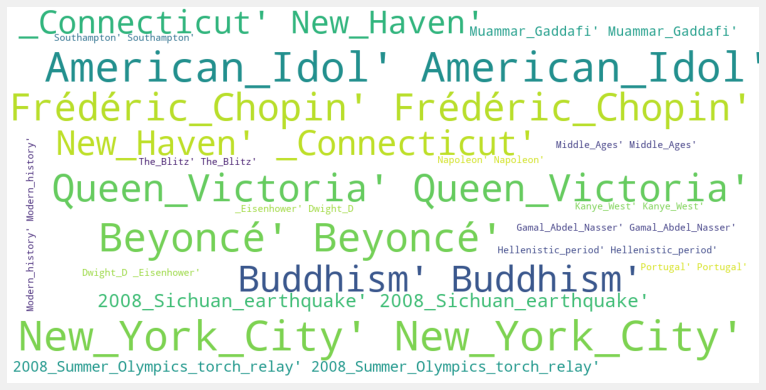

In [144]:
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)